In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd

In [2]:
data = {}
for file in os.listdir():
    if '.json' in file:
        with open(file, 'r') as fp:
            data[file[0]] = json.load(fp)


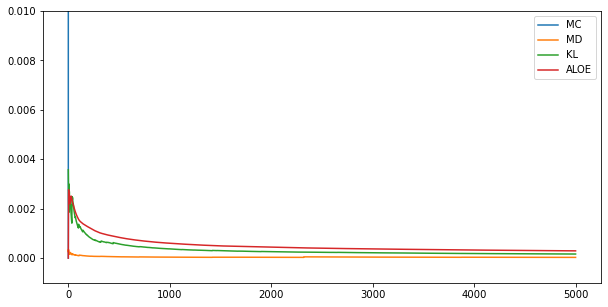

In [3]:
plt.figure(figsize=(10, 5))
for key in data['3'].keys():
    if '_std' in key:
        plt.plot(data['3'][key], label=key.split('_')[0])
plt.ylim(-1e-3, 0.01)
plt.legend()

In [5]:
def get_complexity(stds, tol = 1e-8):
    for i in range(253, len(stds) - 1):
        if np.abs(stds[i] - stds[i + 1]) / stds[-1] <= tol:
            return i

In [8]:
complexities = {}
for data_ in data.keys():
    print("TAU = ", data_)
    print("True proba = ", data[data_]['MD_exp'][-1])
    compl_tmp = {}
    for key in data[data_].keys():
        
        if '_std' in key:
            compl_tmp[key.split('_')[0]] = get_complexity(data[data_][key], tol=0.9 * 1e-3)
            print(key.split('_')[0], ": ", get_complexity(data[data_][key], tol=0.9 * 1e-3), sep='', end=' ')
    complexities[data[data_]['MD_exp'][-1]] = compl_tmp
    print('\n')

TAU =  2
True proba =  0.13564160997923244
MC: 1142 MD: 256 KL: 323 ALOE: 625 

TAU =  3
True proba =  0.011177962994913956
MC: 1136 MD: 336 KL: 306 ALOE: 1029 

TAU =  4
True proba =  0.00033576352328429544
MC: 1128 MD: 305 KL: 288 ALOE: 773 

TAU =  5
True proba =  3.7363332659360857e-06
MC: 1128 MD: 260 KL: 276 ALOE: 867 



<AxesSubplot:>

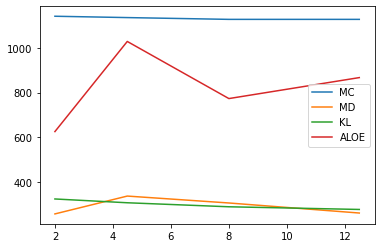

In [9]:
tmp = pd.DataFrame(complexities).T
tmp.index = np.log(1 / tmp.index)
tmp.plot()